# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right", ylabel_="Value"):
    """
    Plot stacked bars with annotations using the dataframe's own columns for labels.
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    
    # Use the column names for the legend automatically
    ax.legend(dataframe.columns, loc=legend_)
    
    plt.ylabel(ylabel_)
    plt.show()
def annotate_stacked_bars(ax, colour="white", textsize=13):
    """
    Add value annotations to the centers of the stacked bars.
    """
    for p in ax.patches:
        height = p.get_height()
        if height > 0: # Only annotate bars with a value
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + height / 2
            
            ax.annotate(
                f'{height:.1f}',
                (x, y),
                ha='center', 
                va='center',
                color=colour,
                size=textsize
            )

def plot_distribution(dataframe, column, group_col, ax, bins_=50):
    """
    Plot variable distribution stacked by a specified grouping column.
    """
    # Create a list of data arrays, one for each unique value in the group_col
    categories = dataframe[group_col].unique()
    data_to_plot = [dataframe[dataframe[group_col] == cat][column].dropna() for cat in categories]
    
    # Plot the stacked histogram
    ax.hist(
        data_to_plot, 
        bins=bins_, 
        stacked=True, 
        label=[str(cat) for cat in categories]
    )
    
    # Formatting
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Distribution of {column} by {group_col}")
    ax.legend(loc='upper right')
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

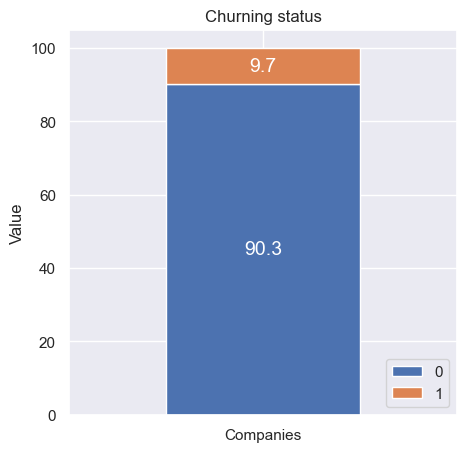

In [10]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

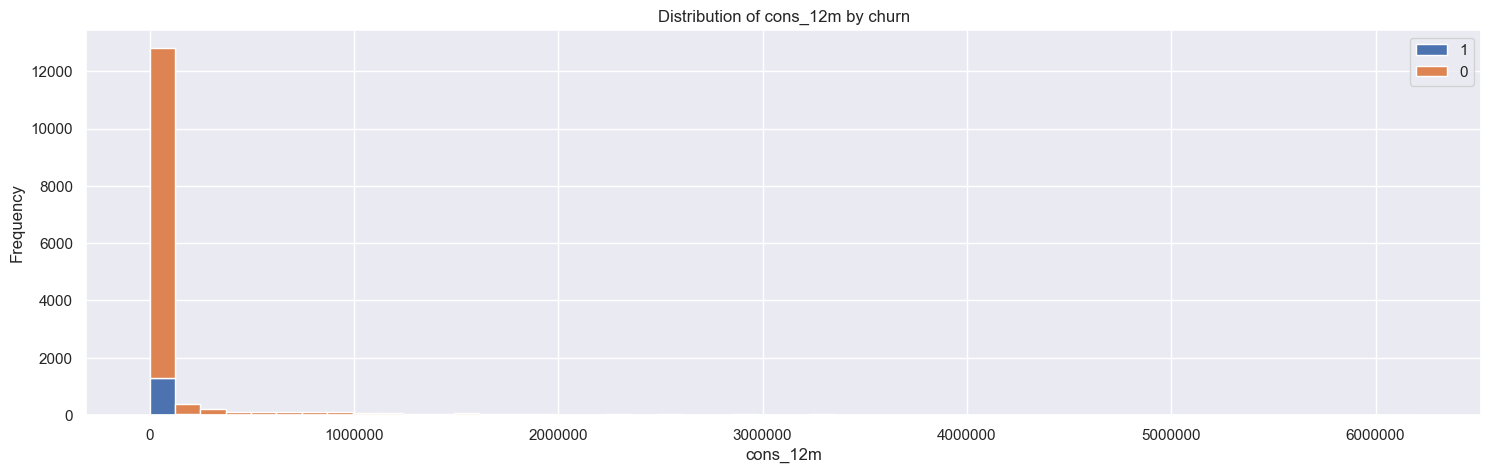

In [14]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', 'churn', axs)

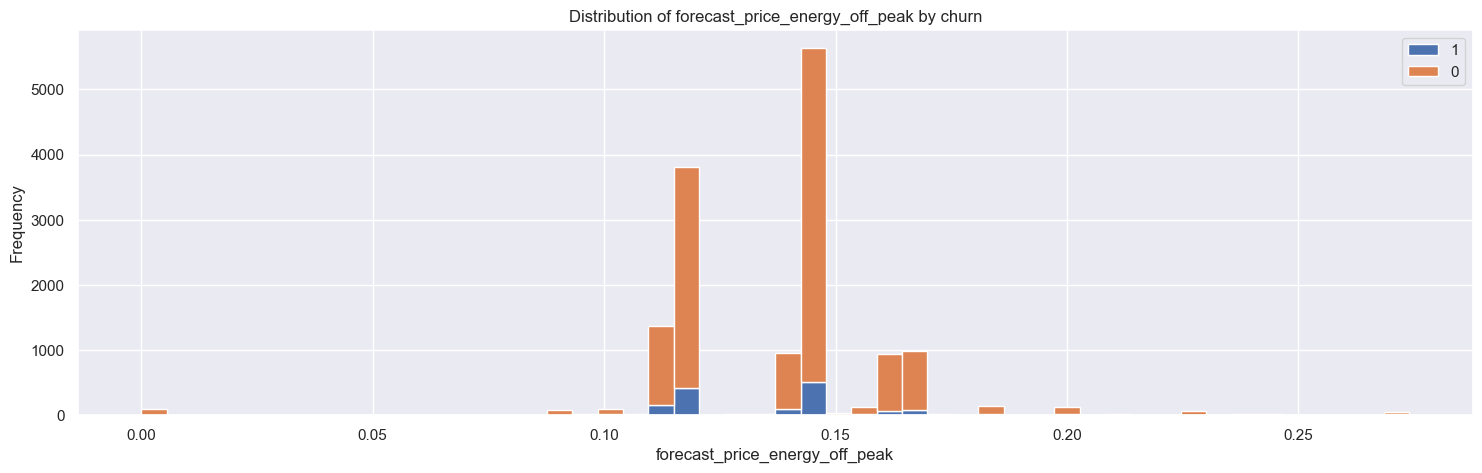

In [16]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(client_df, 'forecast_price_energy_off_peak', 'churn', axs)
plt.show()

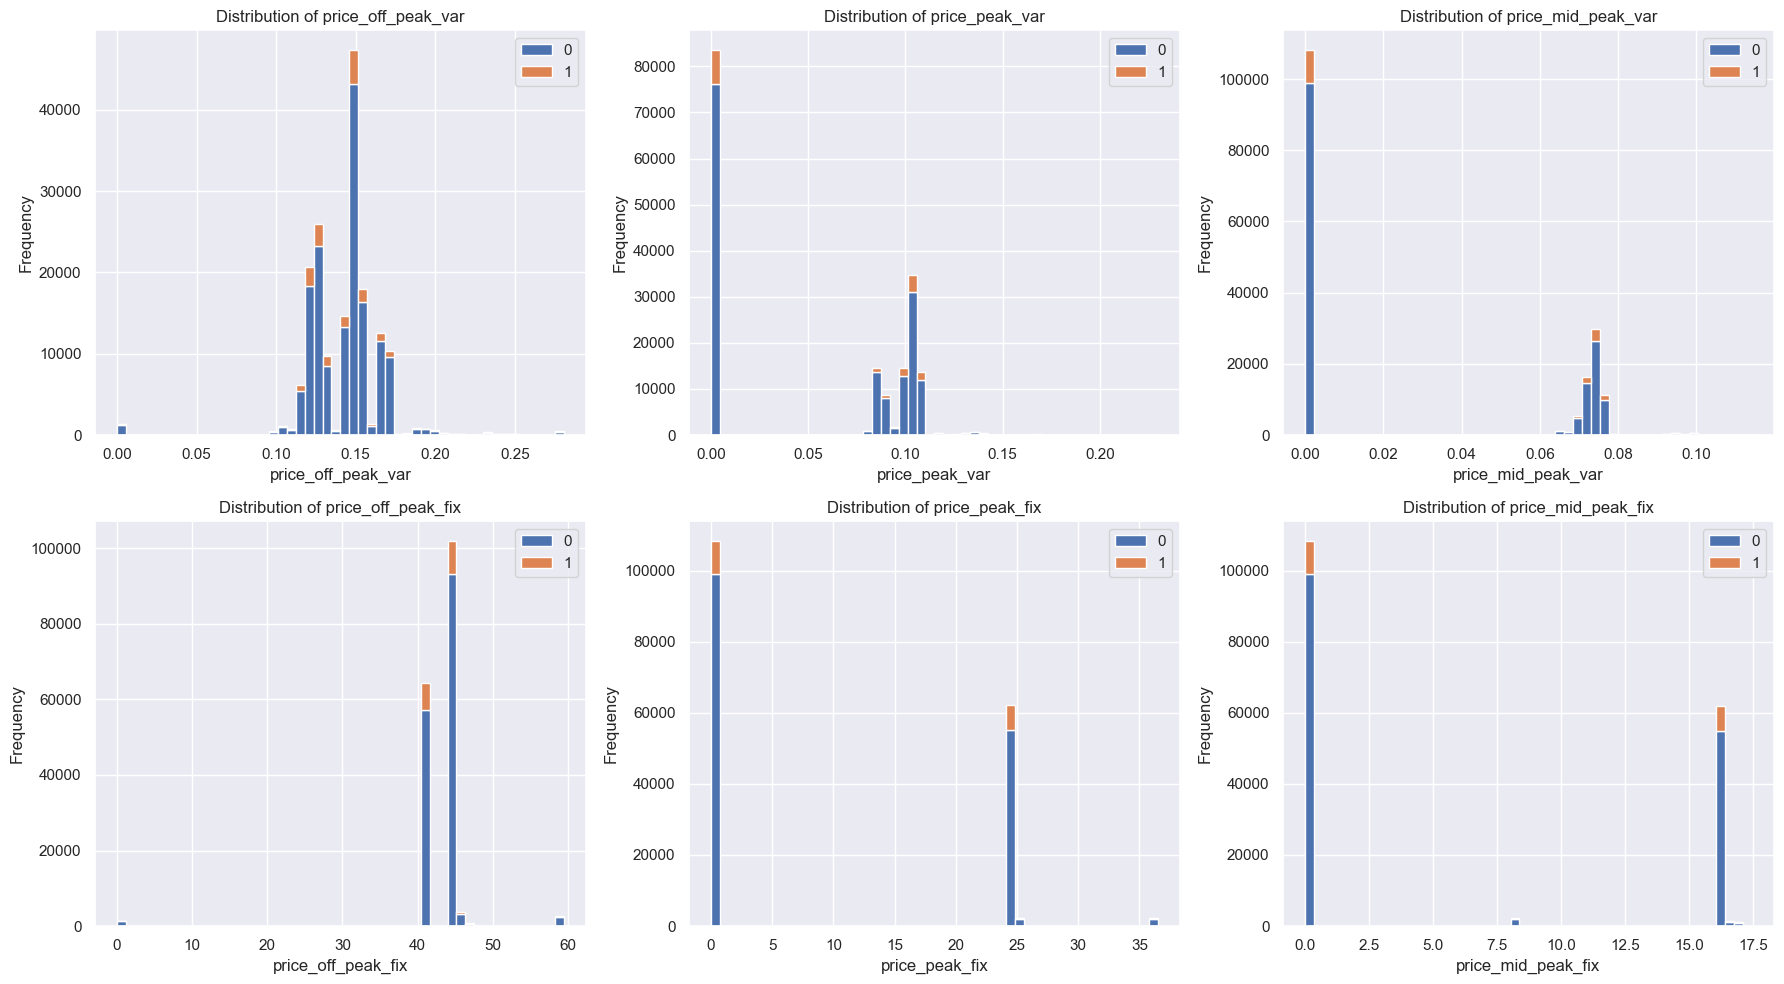

In [18]:
# List of all price columns to check
price_cols = [
    'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
    'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'
]

# Melt the dataframe to make it "long" for easier plotting
price_melted = price_df.merge(client_df[['id', 'churn']], on='id')

# Set up a grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(price_cols):
    plot_distribution(price_melted, col, 'churn', axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

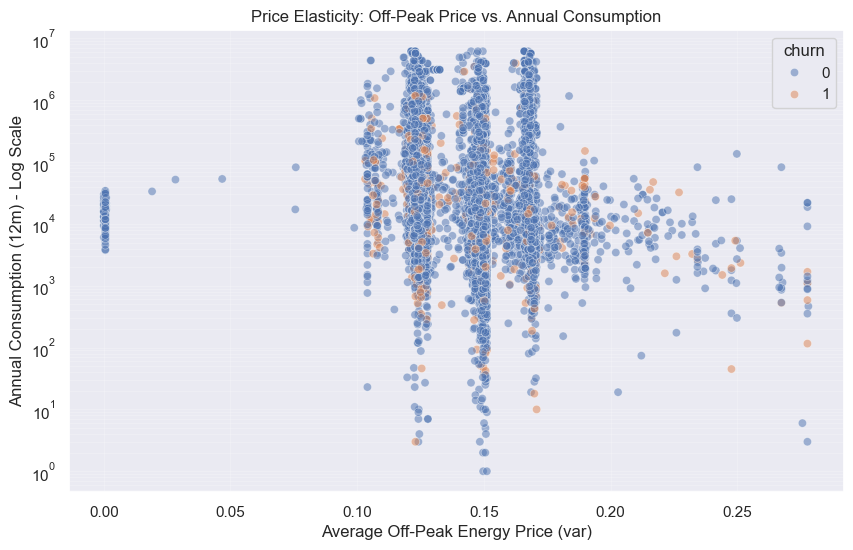

In [19]:
# 2. Aggregate the price data (Average price per client)
# We take the mean price across all dates for each client ID
mean_prices = price_df.groupby('id')['price_off_peak_var'].mean().reset_index()

# 3. Merge with consumption data from client_df
# We only need 'id', 'cons_12m', and 'churn' from the client data
merged_df = pd.merge(client_df[['id', 'cons_12m', 'churn']], mean_prices, on='id')

# 4. Create the Scatter Plot
plt.figure(figsize=(10, 6))

# Using a log scale is highly recommended because energy consumption 
# and prices often span several orders of magnitude.
sns.scatterplot(
    data=merged_df, 
    x='price_off_peak_var', 
    y='cons_12m', 
    hue='churn', 
    alpha=0.5
)

# 5. Formatting for Elasticity Analysis
plt.xscale('linear') # Prices are usually in a tight range
plt.yscale('log')    # Consumption is usually highly skewed
plt.title('Price Elasticity: Off-Peak Price vs. Annual Consumption')
plt.xlabel('Average Off-Peak Energy Price (var)')
plt.ylabel('Annual Consumption (12m) - Log Scale')
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.show()

In [20]:
# 1. Encoding and Feature Prep
df_corr = client_df.copy()

# Convert boolean/categorical to numeric
df_corr['has_gas'] = df_corr['has_gas'].map({'t': 1, 'f': 0})

# Select only numeric columns (excluding ID)
numeric_df = df_corr.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], errors='ignore')

# 2. Calculate Correlations with Churn
correlations = numeric_df.corr()['churn'].sort_values(ascending=False).drop('churn')

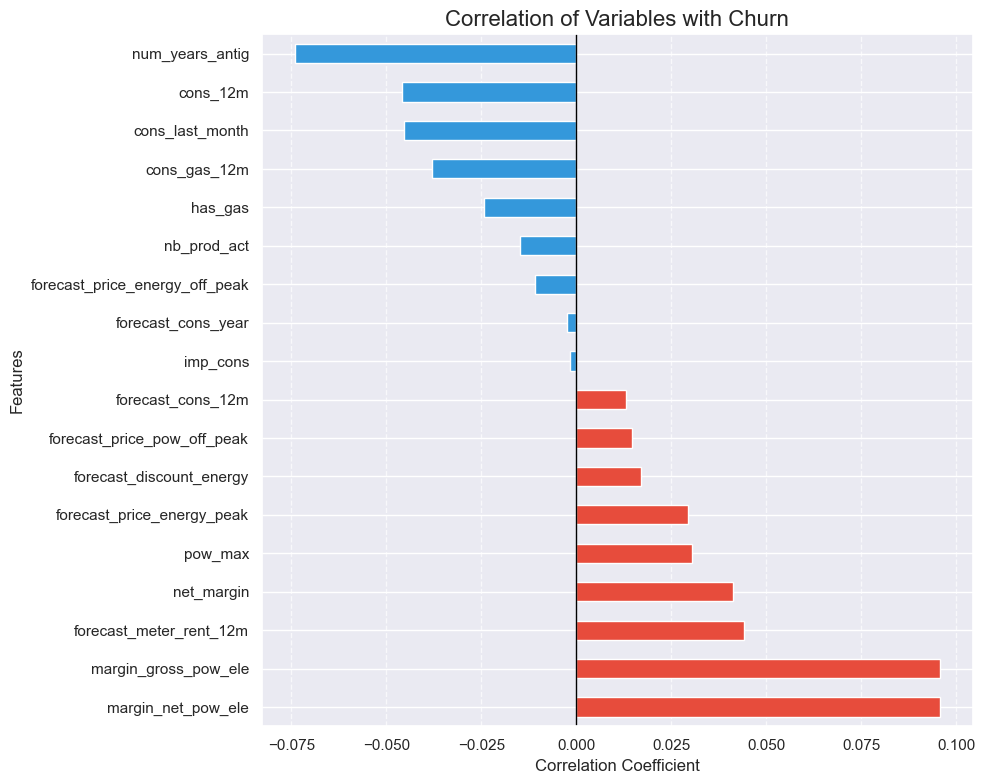

In [21]:
def plot_churn_correlations(correlations, size_=(10, 8)):
    """
    Plots a horizontal bar chart of correlations with the churn target.
    """
    plt.figure(figsize=size_)
    
    # Color code: Positive correlations (Red), Negative (Blue)
    colors = ['#e74c3c' if x > 0 else '#3498db' for x in correlations.values]
    
    ax = correlations.plot(kind='barh', color=colors)
    
    plt.title('Correlation of Variables with Churn', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add a vertical line at 0
    plt.axvline(x=0, color='black', lw=1)
    
    plt.tight_layout()
    plt.show()

plot_churn_correlations(correlations)

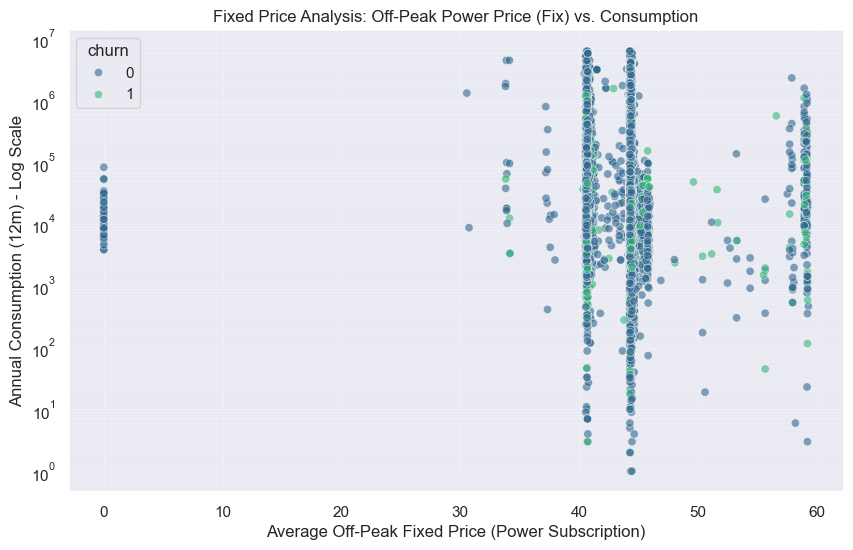

In [22]:
# 2. Aggregate the price data (Average FIXED price per client)
mean_fixed_prices = price_df.groupby('id')['price_off_peak_fix'].mean().reset_index()

# 3. Merge with consumption data
merged_fix_df = pd.merge(client_df[['id', 'cons_12m', 'churn']], mean_fixed_prices, on='id')

# 4. Create the Scatter Plot
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=merged_fix_df, 
    x='price_off_peak_fix', 
    y='cons_12m', 
    hue='churn', 
    palette='viridis',
    alpha=0.6
)

# 5. Formatting
plt.xscale('linear') 
plt.yscale('log')    
plt.title('Fixed Price Analysis: Off-Peak Power Price (Fix) vs. Consumption')
plt.xlabel('Average Off-Peak Fixed Price (Power Subscription)')
plt.ylabel('Annual Consumption (12m) - Log Scale')
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.show()

In [23]:
# Calculate the spread for each row in the price data
price_df['spread_var'] = price_df['price_peak_var'] - price_df['price_off_peak_var']
price_df['spread_fix'] = price_df['price_peak_fix'] - price_df['price_off_peak_fix']

# Aggregate the average spread per client
avg_spread = price_df.groupby('id').agg({
    'spread_var': 'mean',
    'spread_fix': 'mean'
}).reset_index()

# Merge with client data
merged_spread = pd.merge(client_df[['id', 'cons_12m', 'churn']], avg_spread, on='id')

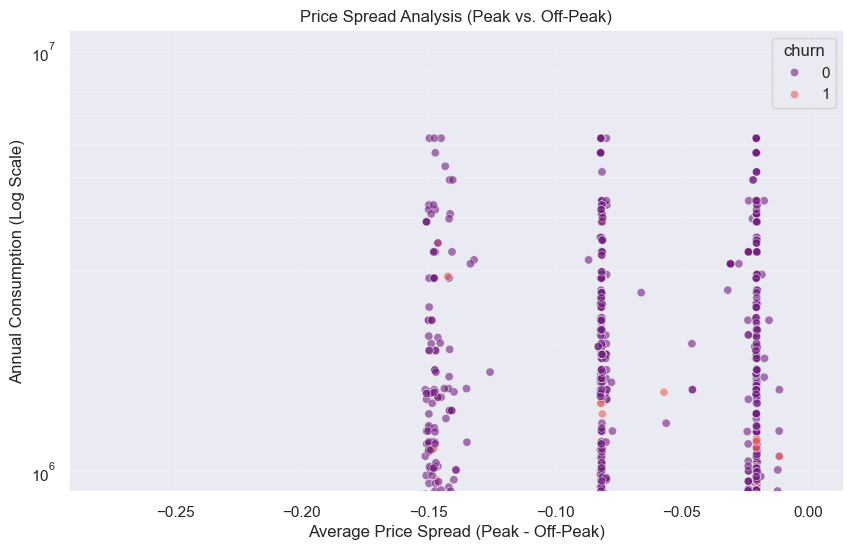

In [24]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=merged_spread,
    x='spread_var',
    y='cons_12m',
    hue='churn',
    alpha=0.6,
    palette='magma'
)

plt.yscale('log')
plt.title('Price Spread Analysis (Peak vs. Off-Peak)')
plt.xlabel('Average Price Spread (Peak - Off-Peak)')
plt.ylabel('Annual Consumption (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.show()

C:\Users\ephet\AppData\Local\Temp\ipykernel_28360\2670893024.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  analysis_pivot = client_with_delta.pivot_table(


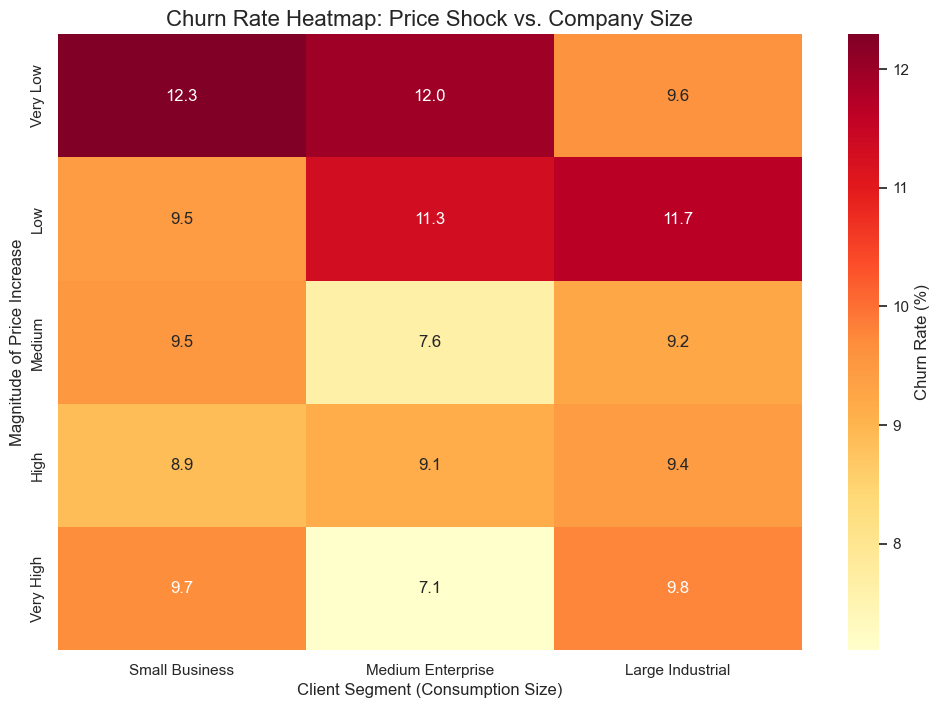

In [25]:
# Ensure dates are correct
price_df['price_date'] = pd.to_datetime(price_df['price_date'])
price_sorted = price_df.sort_values(['id', 'price_date'])

# Group by ID and find the first and last price for each client
price_delta = price_sorted.groupby('id').agg({
    'price_off_peak_var': ['first', 'last'],
    'price_peak_var': ['first', 'last']
}).reset_index()

# Flatten columns: 'price_off_peak_var_first', etc.
price_delta.columns = ['id', 'off_peak_first', 'off_peak_last', 'peak_first', 'peak_last']

# Calculate the actual change
price_delta['delta_off_peak'] = price_delta['off_peak_last'] - price_delta['off_peak_first']
price_delta['delta_peak'] = price_delta['peak_last'] - price_delta['peak_first']

# --- 3. Create the 'client_with_delta' dataframe ---
client_with_delta = pd.merge(client_df, price_delta[['id', 'delta_off_peak', 'delta_peak']], on='id')

# --- 4. Define Segments ---
# Segment A: Price Increase Magnitude (5 Bins)
client_with_delta['price_shock_level'] = pd.qcut(
    client_with_delta['delta_off_peak'], 
    q=5, 
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

# Segment B: Company Size (Based on 12m consumption)
client_with_delta['company_size'] = pd.qcut(
    client_with_delta['cons_12m'], 
    q=3, 
    labels=['Small Business', 'Medium Enterprise', 'Large Industrial']
)

# --- 5. Visualize Impact by Segment ---
# We'll create a pivot table showing Churn Rate (%) for each combination
analysis_pivot = client_with_delta.pivot_table(
    values='churn', 
    index='price_shock_level', 
    columns='company_size', 
    aggfunc='mean'
) * 100

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(analysis_pivot, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Churn Rate (%)'})

plt.title('Churn Rate Heatmap: Price Shock vs. Company Size', fontsize=16)
plt.xlabel('Client Segment (Consumption Size)', fontsize=12)
plt.ylabel('Magnitude of Price Increase', fontsize=12)
plt.show()